In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the data

data=pd.read_csv(r"F:\New folder\Customer_Payment_Dataset_MNC.csv")

In [4]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200763229,MAINES corporation,NaN,2020.0,1.930548e+09,2020-02-27,20200219,20200227,20200313.0,USD,RV,1.0,NaN,3608.68,20200227.0,NAA8,1.930548e+09,1
1,U001,0200769623,WAL-MAR systems,2020-02-07 00:00:00,2020.0,1.930423e+09,2020-01-22,20200121,20200122,20200206.0,USD,RV,1.0,NaN,33631.95,20200122.0,NAH4,1.930423e+09,0
2,CA02,0140104240,FEDER corporation,2019-09-16 00:00:00,2019.0,2.960575e+09,2019-08-24,20190824,20190824,20190911.0,CAD,RV,1.0,NaN,162874.35,20190901.0,CA10,2.960575e+09,0
3,U001,0200782001,GORDO associates,2019-07-31 00:00:00,2019.0,1.929634e+09,2019-07-18,20190718,20190718,20190802.0,USD,RV,1.0,NaN,22820.27,20190718.0,NAA8,1.929634e+09,0
4,U001,0200726979,BJ'S us,NaN,2020.0,1.930716e+09,2020-03-22,20200328,20200322,20200406.0,USD,RV,1.0,NaN,514.48,20200322.0,NAA8,1.930716e+09,1


## Data Cleaning and Pre Processing

In [5]:
# returns count of null values in columns
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [6]:
# This is a Null Column (All 50,000 rows null) and hence needs to be dropped

data.drop("area_business",axis=1,inplace=True)

In [7]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200763229,MAINES corporation,NaN,2020.0,1.930548e+09,2020-02-27,20200219,20200227,20200313.0,USD,RV,1.0,3608.68,20200227.0,NAA8,1.930548e+09,1
1,U001,0200769623,WAL-MAR systems,2020-02-07 00:00:00,2020.0,1.930423e+09,2020-01-22,20200121,20200122,20200206.0,USD,RV,1.0,33631.95,20200122.0,NAH4,1.930423e+09,0
2,CA02,0140104240,FEDER corporation,2019-09-16 00:00:00,2019.0,2.960575e+09,2019-08-24,20190824,20190824,20190911.0,CAD,RV,1.0,162874.35,20190901.0,CA10,2.960575e+09,0
3,U001,0200782001,GORDO associates,2019-07-31 00:00:00,2019.0,1.929634e+09,2019-07-18,20190718,20190718,20190802.0,USD,RV,1.0,22820.27,20190718.0,NAA8,1.929634e+09,0
4,U001,0200726979,BJ'S us,NaN,2020.0,1.930716e+09,2020-03-22,20200328,20200322,20200406.0,USD,RV,1.0,514.48,20200322.0,NAA8,1.930716e+09,1


In [8]:
# Dropping the rows where invoice_id is null
# Since these invoices cannot be verified

data = data[data["invoice_id"].notna()]

In [9]:
data.shape

(49993, 18)

In [10]:
#Splitting the data into test and train where rows having clear_date=NaN becomes a test set and the remaining becomes a train set

main_train = data[data.clear_date.isnull()==False]
main_test = data[data.clear_date.isnull()]

In [11]:
main_train.shape

(39993, 18)

In [12]:
main_test.shape

(10000, 18)

In [13]:
# Dropping the duplicate rows (Refining the data)

main_train.drop_duplicates(keep=False,inplace=True)
main_train.shape

(38310, 18)

In [14]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38310 entries, 1 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           38310 non-null  object 
 1   cust_number             38310 non-null  object 
 2   name_customer           38310 non-null  object 
 3   clear_date              38310 non-null  object 
 4   buisness_year           38310 non-null  float64
 5   doc_id                  38310 non-null  float64
 6   posting_date            38310 non-null  object 
 7   document_create_date    38310 non-null  int64  
 8   document_create_date.1  38310 non-null  int64  
 9   due_in_date             38310 non-null  float64
 10  invoice_currency        38310 non-null  object 
 11  document type           38310 non-null  object 
 12  posting_id              38310 non-null  float64
 13  total_open_amount       38310 non-null  float64
 14  baseline_create_date    38310 non-null

In [15]:
# Converting posting_date to datetime format because we have to sort according to it

main_train["posting_date"]=pd.to_datetime(main_train["posting_date"])

In [16]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38310 entries, 1 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           38310 non-null  object        
 1   cust_number             38310 non-null  object        
 2   name_customer           38310 non-null  object        
 3   clear_date              38310 non-null  object        
 4   buisness_year           38310 non-null  float64       
 5   doc_id                  38310 non-null  float64       
 6   posting_date            38310 non-null  datetime64[ns]
 7   document_create_date    38310 non-null  int64         
 8   document_create_date.1  38310 non-null  int64         
 9   due_in_date             38310 non-null  float64       
 10  invoice_currency        38310 non-null  object        
 11  document type           38310 non-null  object        
 12  posting_id              38310 non-null  float6

In [17]:
# Sorting the table according to posting_date so that we can split it later

main_train=main_train.sort_values("posting_date")
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
29028,U001,0200726979,BJ'S trust,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,53.25,20181230.0,NAA8,1.928541e+09,0
36076,U001,0200769623,WAL-MAR systems,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,47408.76,20181230.0,NAH4,1.928541e+09,0
23354,U001,0200719300,SYSTEMS in,2019-01-15 00:00:00,2019.0,1.928534e+09,2018-12-30,20181231,20181230,20190114.0,USD,RV,1.0,768.00,20181230.0,NAA8,1.928534e+09,0
10265,U001,0200762301,C&S WH,2019-01-15 00:00:00,2019.0,1.928545e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,18684.01,20181230.0,NAC6,1.928545e+09,0
17085,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,14428.46,20181230.0,NAH4,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31174,U001,0200759878,SA systems,2020-03-13 00:00:00,2020.0,1.930570e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,64190.53,20200227.0,NAH4,1.930570e+09,0
48694,U001,0200759878,SA in,2020-03-13 00:00:00,2020.0,1.930571e+09,2020-02-27,20200226,20200227,20200313.0,USD,RV,1.0,11068.73,20200227.0,NAH4,1.930571e+09,0
24996,CA02,0140104950,MULT corporation,2020-03-09 00:00:00,2020.0,2.960617e+09,2020-02-27,20200227,20200227,20200310.0,CAD,RV,1.0,17798.84,20200229.0,CA10,2.960617e+09,0
40125,U001,0200769623,WAL-MAR trust,2020-03-17 00:00:00,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200313.0,USD,RV,1.0,10401.63,20200227.0,NAH4,1.930568e+09,0


In [18]:
# Since we have an updated version of document create date column i.e. document_create_date_1,
# we will drop the older column

main_train.drop("document_create_date",axis=1,inplace=True)

In [19]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
29028,U001,0200726979,BJ'S trust,2019-01-15 00:00:00,2019.0,1.928541e+09,2018-12-30,20181230,20190114.0,USD,RV,1.0,53.25,20181230.0,NAA8,1.928541e+09,0
36076,U001,0200769623,WAL-MAR systems,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181230,20190114.0,USD,RV,1.0,47408.76,20181230.0,NAH4,1.928541e+09,0
23354,U001,0200719300,SYSTEMS in,2019-01-15 00:00:00,2019.0,1.928534e+09,2018-12-30,20181230,20190114.0,USD,RV,1.0,768.00,20181230.0,NAA8,1.928534e+09,0
10265,U001,0200762301,C&S WH,2019-01-15 00:00:00,2019.0,1.928545e+09,2018-12-30,20181230,20190114.0,USD,RV,1.0,18684.01,20181230.0,NAC6,1.928545e+09,0
17085,U001,0200769623,WAL-MAR foundation,2019-01-09 00:00:00,2019.0,1.928541e+09,2018-12-30,20181230,20190114.0,USD,RV,1.0,14428.46,20181230.0,NAH4,1.928541e+09,0


In [20]:
main_train.rename(columns = {'document_create_date.1':'document_create_date_1'}, inplace = True)
main_test.rename(columns = {'document_create_date.1':'document_create_date_1'}, inplace = True)

In [21]:
# Converting all date values to datetime format so that we can split it later

main_train["baseline_create_date"]=pd.to_datetime(main_train["baseline_create_date"], format = '%Y%m%d')
main_train["due_in_date"]=pd.to_datetime(main_train["due_in_date"], format = '%Y%m%d')
main_train["document_create_date_1"]=pd.to_datetime(main_train["document_create_date_1"], format = '%Y%m%d')
main_train["clear_date"]=pd.to_datetime(main_train["clear_date"])
main_train["posting_date"]=pd.to_datetime(main_train["posting_date"])
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
29028,U001,0200726979,BJ'S trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,53.25,2018-12-30,NAA8,1.928541e+09,0
36076,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,47408.76,2018-12-30,NAH4,1.928541e+09,0
23354,U001,0200719300,SYSTEMS in,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,768.00,2018-12-30,NAA8,1.928534e+09,0
10265,U001,0200762301,C&S WH,2019-01-15,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,18684.01,2018-12-30,NAC6,1.928545e+09,0
17085,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14428.46,2018-12-30,NAH4,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31174,U001,0200759878,SA systems,2020-03-13,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,64190.53,2020-02-27,NAH4,1.930570e+09,0
48694,U001,0200759878,SA in,2020-03-13,2020.0,1.930571e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,11068.73,2020-02-27,NAH4,1.930571e+09,0
24996,CA02,0140104950,MULT corporation,2020-03-09,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,17798.84,2020-02-29,CA10,2.960617e+09,0
40125,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,1.930568e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,10401.63,2020-02-27,NAH4,1.930568e+09,0


In [22]:
# Setting up a new Delay column (Target) and storing the values

main_train["delay"]=(main_train['clear_date']-main_train['due_in_date']).dt.days

In [23]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
29028,U001,0200726979,BJ'S trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,53.25,2018-12-30,NAA8,1.928541e+09,0,1
36076,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,47408.76,2018-12-30,NAH4,1.928541e+09,0,-5
23354,U001,0200719300,SYSTEMS in,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,768.00,2018-12-30,NAA8,1.928534e+09,0,1
10265,U001,0200762301,C&S WH,2019-01-15,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,18684.01,2018-12-30,NAC6,1.928545e+09,0,1
17085,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14428.46,2018-12-30,NAH4,1.928541e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31174,U001,0200759878,SA systems,2020-03-13,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,64190.53,2020-02-27,NAH4,1.930570e+09,0,0
48694,U001,0200759878,SA in,2020-03-13,2020.0,1.930571e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,11068.73,2020-02-27,NAH4,1.930571e+09,0,0
24996,CA02,0140104950,MULT corporation,2020-03-09,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,17798.84,2020-02-29,CA10,2.960617e+09,0,-1
40125,U001,0200769623,WAL-MAR trust,2020-03-17,2020.0,1.930568e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,10401.63,2020-02-27,NAH4,1.930568e+09,0,4


In [24]:
# Analysing the covariance to get more detail about the deviations in values

main_train.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,delay
buisness_year,1.142730e-01,-1.380043e+06,0.0,-1.567828e+02,-1.380043e+06,0.0,-2.036177e-02
doc_id,-1.380043e+06,7.973127e+16,0.0,2.157224e+12,7.973127e+16,0.0,4.293058e+08
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
total_open_amount,-1.567828e+02,2.157224e+12,0.0,1.742518e+09,2.157224e+12,0.0,-1.693335e+03
invoice_id,-1.380043e+06,7.973127e+16,0.0,2.157224e+12,7.973127e+16,0.0,4.293058e+08
isOpen,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
delay,-2.036177e-02,4.293058e+08,0.0,-1.693335e+03,4.293058e+08,0.0,1.208640e+02


In [25]:
#Finding Constant Columns

main_train.nunique()

business_code                 5
cust_number                1306
name_customer              3850
clear_date                  400
buisness_year                 2
doc_id                    38310
posting_date                422
document_create_date_1      422
due_in_date                 491
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         34941
baseline_create_date        433
cust_payment_terms           68
invoice_id                38310
isOpen                        1
delay                       175
dtype: int64

In [26]:
# Checking the columns which have less unique values and displaying the counts

for col in main_train.columns:
    if main_train[col].nunique()<= 5:
        print(main_train[col].value_counts())
        print('======================================')

U001    34538
CA02     3134
U013      511
U002      114
U005       13
Name: business_code, dtype: int64
2019.0    33269
2020.0     5041
Name: buisness_year, dtype: int64
USD    35176
CAD     3134
Name: invoice_currency, dtype: int64
RV    38310
Name: document type, dtype: int64
1.0    38310
Name: posting_id, dtype: int64
0    38310
Name: isOpen, dtype: int64


## Splitting

In [27]:
#Creating X and y which are required as a parameter to train_test_split function.
# X = data without the delay column
# y = contains only delay column (target)

X = main_train.drop("delay",axis=1)
y = main_train["delay"]

In [28]:
# Splitting this data into train and test first : doing a 74:26 split
# since we need ~30000 data in train, and ~5000 each in test and validation sets
# i.e 26% data fed to intermediate test data set
# Shuffelling is not needed since data has to be split sequentially

from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.26,random_state=0 , shuffle = False)

In [29]:
# Splitting the intermediate test again into test set and validation set such that both get half of the rows.

X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0, shuffle = False)

In [30]:
# Verifying the size of all the 3 dataframes after splitting
# Here we found out that splitting is as per the expectations

X_train.shape , X_val.shape , X_test.shape

((28349, 17), (4980, 17), (4981, 17))

## EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='delay', ylabel='Density'>

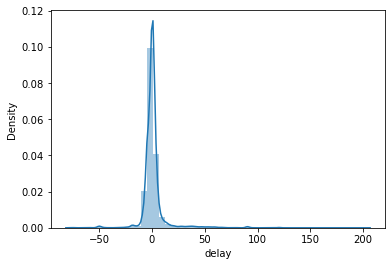

In [31]:
# This is the distribution of target column
# This is slightly right skewed distribution
# No noticeable outliers present
sns.distplot(y_train)

In [32]:
# Merging y_train onto X_train
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,29028,U001,0200726979,BJ'S trust,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,53.25,2018-12-30,NAA8,1.928541e+09,0,1
1,36076,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,47408.76,2018-12-30,NAH4,1.928541e+09,0,-5
2,23354,U001,0200719300,SYSTEMS in,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,768.00,2018-12-30,NAA8,1.928534e+09,0,1
3,10265,U001,0200762301,C&S WH,2019-01-15,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,18684.01,2018-12-30,NAC6,1.928545e+09,0,1
4,17085,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14428.46,2018-12-30,NAH4,1.928541e+09,0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28344,32637,U001,0200799342,MITCH us,2019-11-08,2019.0,1.930049e+09,2019-10-24,2019-10-24,2019-11-08,USD,RV,1.0,49849.15,2019-10-24,NAA8,1.930049e+09,0,0
28345,8007,U001,0200772670,ASSOCIAT llc,2019-11-12,2019.0,1.930052e+09,2019-10-24,2019-10-24,2019-11-08,USD,RV,1.0,4019.54,2019-10-24,NAU5,1.930052e+09,0,4
28346,32594,U001,0200774000,RALEY,2019-11-07,2019.0,1.930051e+09,2019-10-24,2019-10-24,2019-11-08,USD,RV,1.0,17377.95,2019-10-24,NAA8,1.930051e+09,0,-1
28347,8565,U001,0200769623,WAL-MAR co,2019-11-12,2019.0,1.930050e+09,2019-10-24,2019-10-24,2019-11-08,USD,RV,1.0,55156.96,2019-10-24,NAH4,1.930050e+09,0,4


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

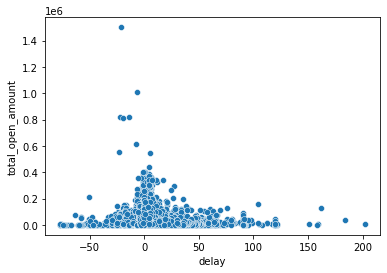

In [33]:
#No relation found
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x="delay",y="total_open_amount")

<AxesSubplot:xlabel='business_code', ylabel='count'>

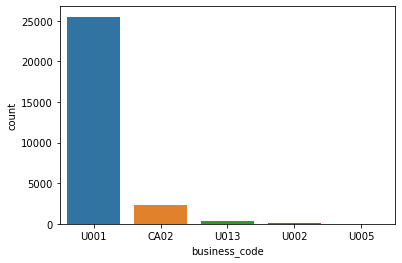

In [34]:
# Here we observe that most records have the business code as U001
sns.countplot(x = X_train['business_code'])

In [35]:
# Let's explore business code further because here 2 codes are almost negligible
X_train.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2351
USD               U001             25493
                  U013               404
                  U002                90
                  U005                11
Name: business_code, dtype: int64

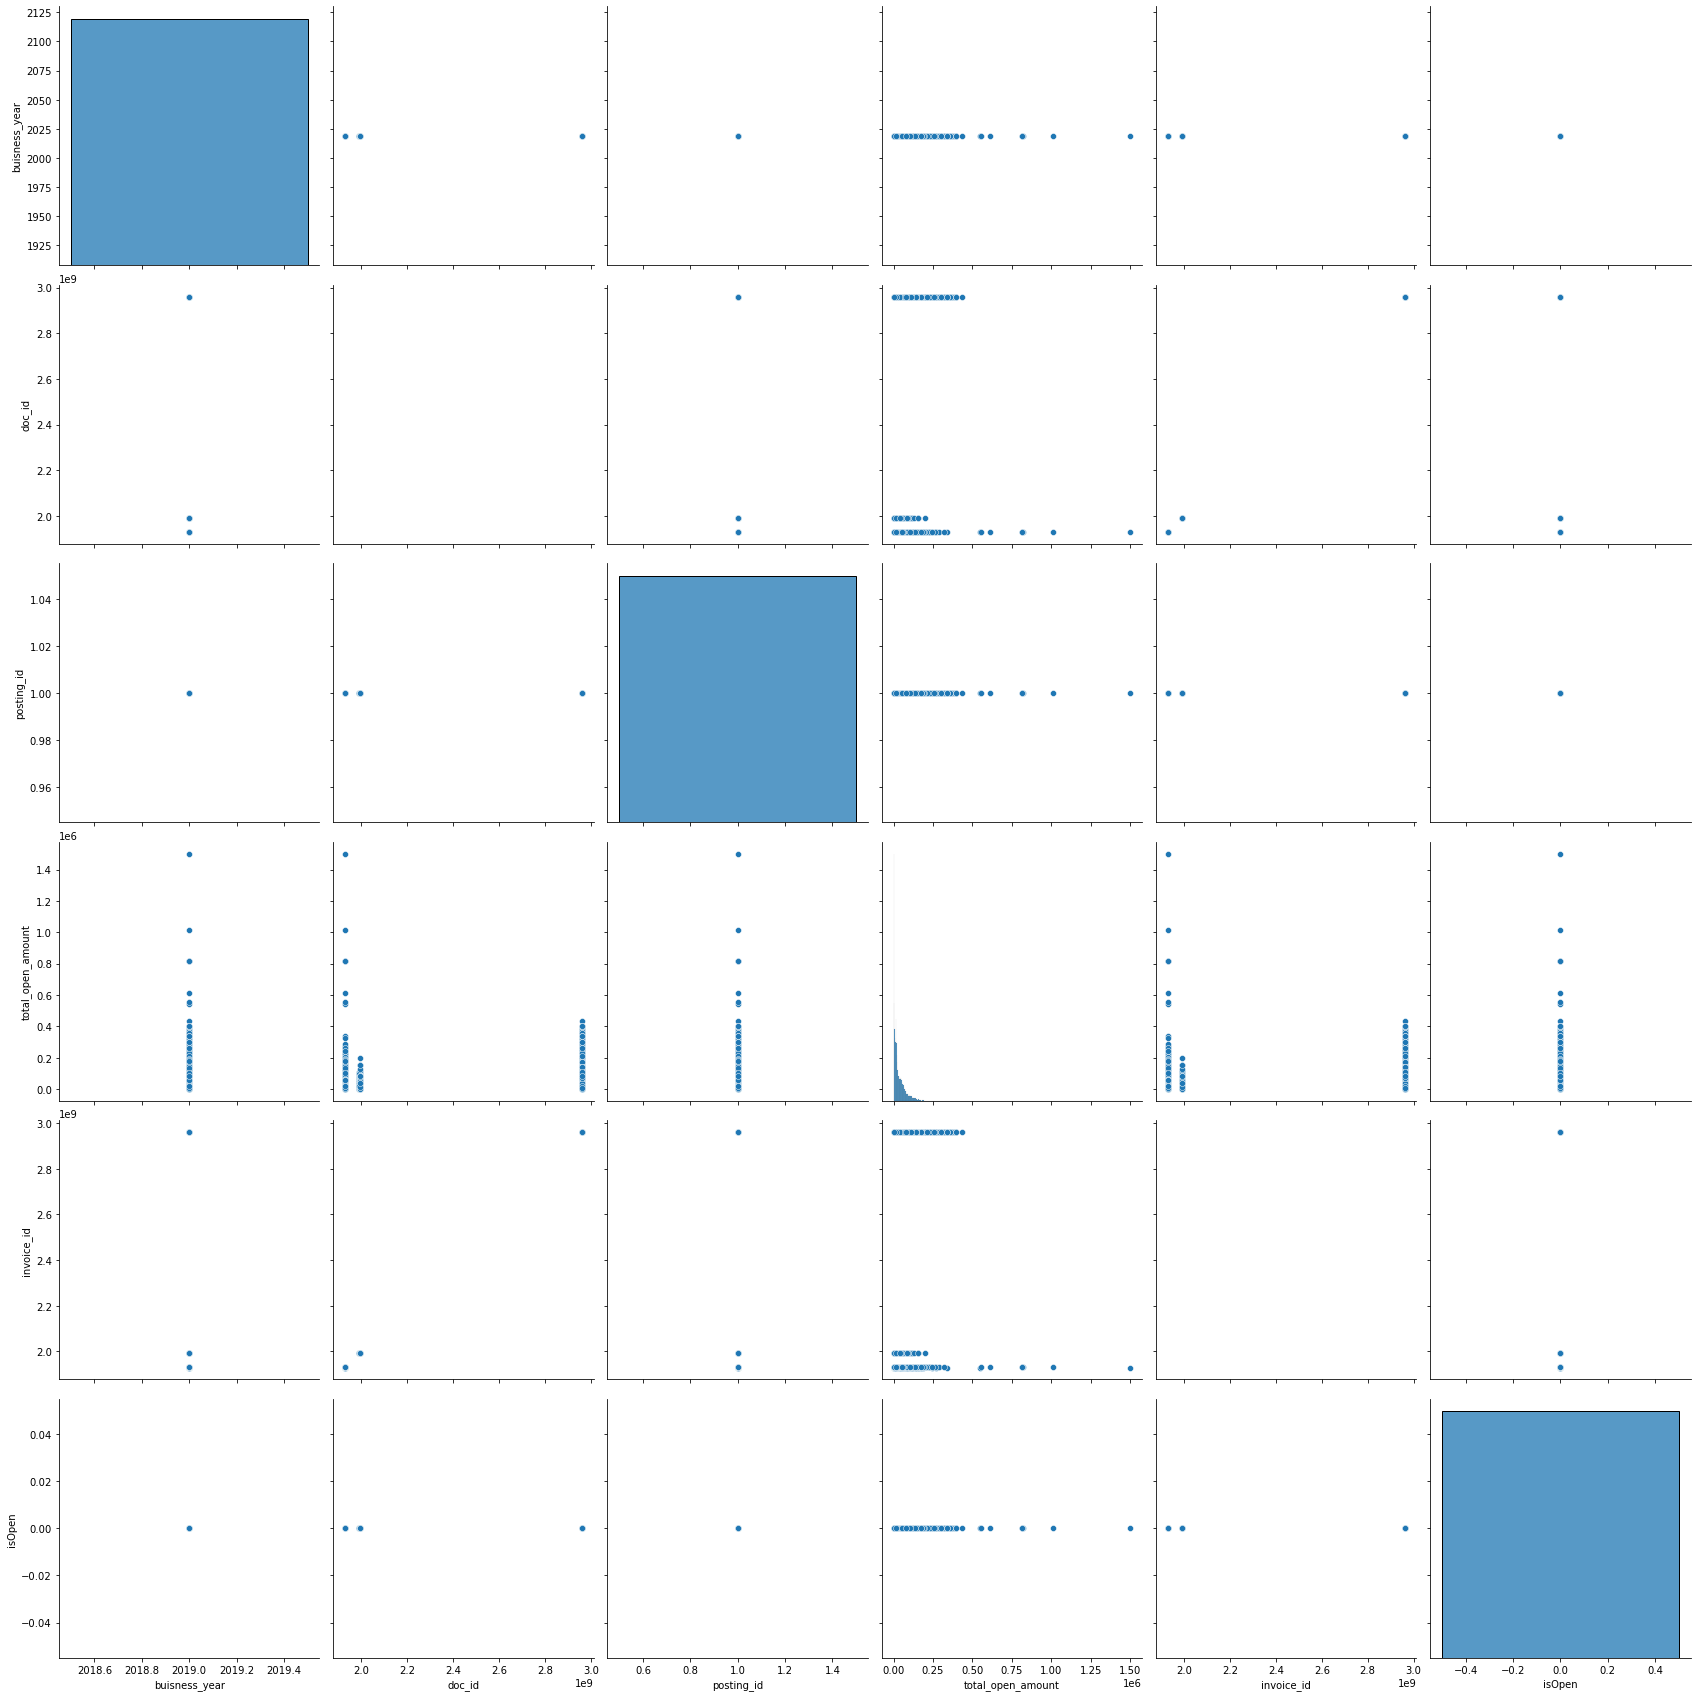

In [36]:
# Let's find out relation between several features in this dataset using pairplot
sns.pairplot(X_train,height=4)

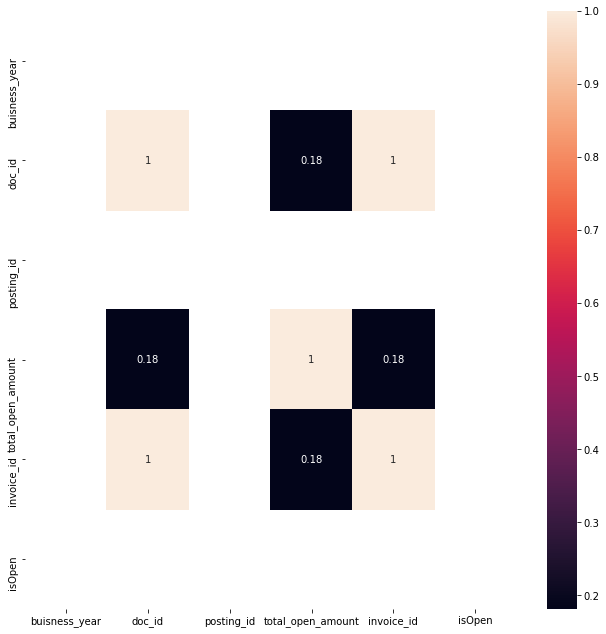

In [37]:
# We found out that Posting id is a constant column
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Feature Engineering

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28349 non-null  object        
 1   cust_number             28349 non-null  object        
 2   name_customer           28349 non-null  object        
 3   clear_date              28349 non-null  datetime64[ns]
 4   buisness_year           28349 non-null  float64       
 5   doc_id                  28349 non-null  float64       
 6   posting_date            28349 non-null  datetime64[ns]
 7   document_create_date_1  28349 non-null  datetime64[ns]
 8   due_in_date             28349 non-null  datetime64[ns]
 9   invoice_currency        28349 non-null  object        
 10  document type           28349 non-null  object        
 11  posting_id              28349 non-null  float64       
 12  total_open_amount       28349 non-null  fl

In [39]:
from sklearn.preprocessing import LabelEncoder

# Labelling USD and CAD as 0 and 1 using Label Encoder

Currency_encoder = LabelEncoder()
Currency_encoder.fit(X_train['invoice_currency'])
X_train['Currency_enc'] = Currency_encoder.transform(X_train['invoice_currency'])

In [40]:
X_train[["Currency_enc","invoice_currency"]]

,Currency_enc,invoice_currency
29028,1,USD
36076,1,USD
23354,1,USD
10265,1,USD
17085,1,USD
...,...,...
32637,1,USD
8007,1,USD
32594,1,USD
8565,1,USD


In [41]:
# Labelling USD and CAD in Train and Validation set as well
X_val['Currency_enc'] = Currency_encoder.transform(X_val['invoice_currency'])
X_test['Currency_enc'] = Currency_encoder.transform(X_test['invoice_currency'])

In [42]:
X_test[['Currency_enc','invoice_currency']]

,Currency_enc,invoice_currency
39648,1,USD
34748,1,USD
16974,1,USD
18057,1,USD
30727,1,USD
...,...,...
31174,1,USD
48694,1,USD
24996,0,CAD
40125,1,USD


In [43]:
# Removing invoice_currency column since it is already encoded and transformed into a different column : Currency_enc
X_train.drop(['invoice_currency'], axis=1,inplace=True)
X_val.drop(['invoice_currency'], axis=1 , inplace=True)
X_test.drop(['invoice_currency'], axis=1 , inplace=True)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28349 non-null  object        
 1   cust_number             28349 non-null  object        
 2   name_customer           28349 non-null  object        
 3   clear_date              28349 non-null  datetime64[ns]
 4   buisness_year           28349 non-null  float64       
 5   doc_id                  28349 non-null  float64       
 6   posting_date            28349 non-null  datetime64[ns]
 7   document_create_date_1  28349 non-null  datetime64[ns]
 8   due_in_date             28349 non-null  datetime64[ns]
 9   document type           28349 non-null  object        
 10  posting_id              28349 non-null  float64       
 11  total_open_amount       28349 non-null  float64       
 12  baseline_create_date    28349 non-null  da

In [45]:
# function will delete a column from train , val and test
# so that we don't have to perform drop function for 3 datasets separately

def warbeast(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis=1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [46]:
# Custom funtion to check information about all the three datasets so that we don't have to perform function separately
def info_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("=============================")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("=================Train Null Count=================")
    print(traindf.isna().sum())
    print("=================Test Null Count=================")
    print(testdf.isna().sum())    
    print("=================Val Null Count=================")
    print(valdf.isna().sum())
    print("INFORMATION PRINTED ABOVE")

In [47]:
# Clear Day
# 0 --> Monday , 6 --> Sunday
X_train['clearing_day_of_week'] = X_train['clear_date'].dt.weekday 
X_val['clearing_day_of_week'] = X_val['clear_date'].dt.weekday 
X_test['clearing_day_of_week'] = X_test['clear_date'].dt.weekday

In [48]:
# Posting Day
X_train['posting_day_of_week'] = X_train['posting_date'].dt.weekday 
X_val['posting_day_of_week'] = X_val['posting_date'].dt.weekday 
X_test['posting_day_of_week'] = X_test['posting_date'].dt.weekday

In [49]:
# Due Day
X_train['due_day_of_week'] = X_train['due_in_date'].dt.weekday 
X_val['due_day_of_week'] = X_val['due_in_date'].dt.weekday 
X_test['due_day_of_week'] = X_test['due_in_date'].dt.weekday

In [50]:
# Baseline Create Day
X_train['baseline_day_of_week'] = X_train['baseline_create_date'].dt.weekday 
X_val['baseline_day_of_week'] = X_val['baseline_create_date'].dt.weekday 
X_test['baseline_day_of_week'] = X_test['baseline_create_date'].dt.weekday

In [51]:
#extract day,month and year from all the three data frames from Clear Date (Train, Val, Test)

X_train['clearing_day'] = X_train['clear_date'].dt.day
X_train['clearing_month'] = X_train['clear_date'].dt.month
X_train['clearing_year'] = X_train['clear_date'].dt.year

X_val['clearing_day'] = X_val['clear_date'].dt.day
X_val['clearing_month'] = X_val['clear_date'].dt.month
X_val['clearing_year'] = X_val['clear_date'].dt.year


X_test['clearing_day'] = X_test['clear_date'].dt.day
X_test['clearing_month'] = X_test['clear_date'].dt.month
X_test['clearing_year'] = X_test['clear_date'].dt.year

In [52]:
X_train ,X_val, X_test = warbeast(['clear_date'])

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28349 non-null  object        
 1   cust_number             28349 non-null  object        
 2   name_customer           28349 non-null  object        
 3   buisness_year           28349 non-null  float64       
 4   doc_id                  28349 non-null  float64       
 5   posting_date            28349 non-null  datetime64[ns]
 6   document_create_date_1  28349 non-null  datetime64[ns]
 7   due_in_date             28349 non-null  datetime64[ns]
 8   document type           28349 non-null  object        
 9   posting_id              28349 non-null  float64       
 10  total_open_amount       28349 non-null  float64       
 11  baseline_create_date    28349 non-null  datetime64[ns]
 12  cust_payment_terms      28349 non-null  ob

In [54]:
X_train.nunique()

business_code                 5
cust_number                1207
name_customer              3370
buisness_year                 1
doc_id                    28349
posting_date                299
document_create_date_1      299
due_in_date                 347
document type                 1
posting_id                    1
total_open_amount         26041
baseline_create_date        308
cust_payment_terms           62
invoice_id                28349
isOpen                        1
Currency_enc                  2
clearing_day_of_week          7
posting_day_of_week           7
due_day_of_week               7
baseline_day_of_week          7
clearing_day                 31
clearing_month               12
clearing_year                 1
dtype: int64

In [55]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date_1,due_in_date,document type,posting_id,...,invoice_id,isOpen,Currency_enc,clearing_day_of_week,posting_day_of_week,due_day_of_week,baseline_day_of_week,clearing_day,clearing_month,clearing_year
29028,U001,0200726979,BJ'S trust,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,RV,1.0,...,1.928541e+09,0,1,1,6,0,6,15,1,2019
36076,U001,0200769623,WAL-MAR systems,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,RV,1.0,...,1.928541e+09,0,1,2,6,0,6,9,1,2019
23354,U001,0200719300,SYSTEMS in,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,RV,1.0,...,1.928534e+09,0,1,1,6,0,6,15,1,2019
10265,U001,0200762301,C&S WH,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,RV,1.0,...,1.928545e+09,0,1,1,6,0,6,15,1,2019
17085,U001,0200769623,WAL-MAR foundation,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,RV,1.0,...,1.928541e+09,0,1,2,6,0,6,9,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,U001,0200799342,MITCH us,2019.0,1.930049e+09,2019-10-24,2019-10-24,2019-11-08,RV,1.0,...,1.930049e+09,0,1,4,3,4,3,8,11,2019
8007,U001,0200772670,ASSOCIAT llc,2019.0,1.930052e+09,2019-10-24,2019-10-24,2019-11-08,RV,1.0,...,1.930052e+09,0,1,1,3,4,3,12,11,2019
32594,U001,0200774000,RALEY,2019.0,1.930051e+09,2019-10-24,2019-10-24,2019-11-08,RV,1.0,...,1.930051e+09,0,1,3,3,4,3,7,11,2019
8565,U001,0200769623,WAL-MAR co,2019.0,1.930050e+09,2019-10-24,2019-10-24,2019-11-08,RV,1.0,...,1.930050e+09,0,1,1,3,4,3,12,11,2019


In [56]:
# Removing Constant Columns which doesn't provide any value to our model
X_train ,X_val, X_test = warbeast(['buisness_year','document type','posting_id','isOpen'])

In [57]:
X_train ,X_val, X_test = warbeast(['clearing_year'])

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28349 non-null  object        
 1   cust_number             28349 non-null  object        
 2   name_customer           28349 non-null  object        
 3   doc_id                  28349 non-null  float64       
 4   posting_date            28349 non-null  datetime64[ns]
 5   document_create_date_1  28349 non-null  datetime64[ns]
 6   due_in_date             28349 non-null  datetime64[ns]
 7   total_open_amount       28349 non-null  float64       
 8   baseline_create_date    28349 non-null  datetime64[ns]
 9   cust_payment_terms      28349 non-null  object        
 10  invoice_id              28349 non-null  float64       
 11  Currency_enc            28349 non-null  int32         
 12  clearing_day_of_week    28349 non-null  in

In [59]:
# Below columns doesn't provide any information for our model
X_train ,X_val, X_test = warbeast(['name_customer'])

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           28349 non-null  object        
 1   cust_number             28349 non-null  object        
 2   doc_id                  28349 non-null  float64       
 3   posting_date            28349 non-null  datetime64[ns]
 4   document_create_date_1  28349 non-null  datetime64[ns]
 5   due_in_date             28349 non-null  datetime64[ns]
 6   total_open_amount       28349 non-null  float64       
 7   baseline_create_date    28349 non-null  datetime64[ns]
 8   cust_payment_terms      28349 non-null  object        
 9   invoice_id              28349 non-null  float64       
 10  Currency_enc            28349 non-null  int32         
 11  clearing_day_of_week    28349 non-null  int64         
 12  posting_day_of_week     28349 non-null  in

In [61]:
# label encode business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc']=business_code_encoder.transform(X_train['business_code'])

In [62]:
# finding out the new catagories in the validation set
newvar = set(X_val['business_code'])-set(business_code_encoder.classes_)

# adding them to the classess variable
for items in newvar:
    business_code_encoder.classes_ = np.append(business_code_encoder.classes_,items)

In [63]:
X_val['business_code_enc']=business_code_encoder.transform(X_val['business_code'])

In [64]:
# finding out new categories in test set
newvar2 = set(X_test['business_code'])-set(business_code_encoder.classes_)

# adding them to the classes variable
for items in newvar2:
    business_code_encoder.classes_ = np.append(business_code_encoder.classes_,items)

In [65]:
X_test['business_code_enc']=business_code_encoder.transform(X_test['business_code'])

In [66]:
# label encode cust payment terms
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [67]:
# finding out the new catagories in the validation set
newvar3 = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable
for items in newvar3:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [68]:
X_val['cust_payment_terms_enc']=cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])

In [69]:
# finding out the new catagories in the test set
newvar4 = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable
for items in newvar4:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [70]:
X_test['cust_payment_terms_enc']=cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [71]:
# Removing these columns since already encoded into another column
X_train ,X_val, X_test = warbeast(['business_code','cust_payment_terms'])

In [72]:
# label encode cust number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc']=cust_number_encoder.transform(X_train['cust_number'])

In [73]:
# finding out the new catagories in the validation set
newvar5 = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable
for items in newvar5:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [74]:
X_val['cust_number_enc']=cust_number_encoder.transform(X_val['cust_number'])

In [75]:
# finding out the new catagories in the test set
newvar6 = set(X_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable
for items in newvar6:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [76]:
X_test['cust_number_enc']=cust_number_encoder.transform(X_test['cust_number'])

In [77]:
# Removing this column since already encoded into another column
X_train ,X_val, X_test = warbeast(['cust_number'])

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   doc_id                  28349 non-null  float64       
 1   posting_date            28349 non-null  datetime64[ns]
 2   document_create_date_1  28349 non-null  datetime64[ns]
 3   due_in_date             28349 non-null  datetime64[ns]
 4   total_open_amount       28349 non-null  float64       
 5   baseline_create_date    28349 non-null  datetime64[ns]
 6   invoice_id              28349 non-null  float64       
 7   Currency_enc            28349 non-null  int32         
 8   clearing_day_of_week    28349 non-null  int64         
 9   posting_day_of_week     28349 non-null  int64         
 10  due_day_of_week         28349 non-null  int64         
 11  baseline_day_of_week    28349 non-null  int64         
 12  clearing_day            28349 non-null  in

In [79]:
# Removing more useless columns
X_train ,X_val, X_test = warbeast(['invoice_id','doc_id'])

In [80]:
#extract day,month and year from all the three data frames of posting_date column(Train, Val, Test)

X_train['posting_day'] = X_train['posting_date'].dt.day
X_train['posting_month'] = X_train['posting_date'].dt.month
X_train['posting_year'] = X_train['posting_date'].dt.year

X_val['posting_day'] = X_val['posting_date'].dt.day
X_val['posting_month'] = X_val['posting_date'].dt.month
X_val['posting_year'] = X_val['posting_date'].dt.year


X_test['posting_day'] = X_test['posting_date'].dt.day
X_test['posting_month'] = X_test['posting_date'].dt.month
X_test['posting_year'] = X_test['posting_date'].dt.year

In [81]:
X_train ,X_val, X_test = warbeast(['posting_date'])

In [82]:
#extract day,month and year from all the three data frames of baseline_create_date column(Train, Val, Test)

X_train['baseline_create_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_year'] = X_train['baseline_create_date'].dt.year

X_val['baseline_create_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_year'] = X_val['baseline_create_date'].dt.year


X_test['baseline_create_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_year'] = X_test['baseline_create_date'].dt.year

In [83]:
X_train ,X_val, X_test = warbeast(['baseline_create_date'])

In [84]:
#extract day,month and year from all the three data frames of document_create_date_1 column(Train, Val, Test)

#X_train['document_create_day'] = X_train['document_create_date_1'].dt.day
#X_train['document_create_month'] = X_train['document_create_date_1'].dt.month
#X_train['document_create_year'] = X_train['document_create_date_1'].dt.year

#X_val['document_create_day'] = X_val['document_create_date_1'].dt.day
#X_val['document_create_month'] = X_val['document_create_date_1'].dt.month
#X_val['document_create_year'] = X_val['document_create_date_1'].dt.year


#X_test['document_create_day'] = X_test['document_create_date_1'].dt.day
#X_test['document_create_month'] = X_test['document_create_date_1'].dt.month
#X_test['document_create_year'] = X_test['document_create_date_1'].dt.year

# Drop document_create_date_1 since it is not affecting our model

In [85]:
X_train ,X_val, X_test = warbeast(['document_create_date_1'])

In [86]:
#extract day,month and year from all the three data frames of due_in_date column(Train, Val, Test)

X_train['due_in_day'] = X_train['due_in_date'].dt.day
X_train['due_in_month'] = X_train['due_in_date'].dt.month
X_train['due_in_year'] = X_train['due_in_date'].dt.year

X_val['due_in_day'] = X_val['due_in_date'].dt.day
X_val['due_in_month'] = X_val['due_in_date'].dt.month
X_val['due_in_year'] = X_val['due_in_date'].dt.year


X_test['due_in_day'] = X_test['due_in_date'].dt.day
X_test['due_in_month'] = X_test['due_in_date'].dt.month
X_test['due_in_year'] = X_test['due_in_date'].dt.year

In [87]:
X_train ,X_val, X_test = warbeast(['due_in_date'])

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_open_amount       28349 non-null  float64
 1   Currency_enc            28349 non-null  int32  
 2   clearing_day_of_week    28349 non-null  int64  
 3   posting_day_of_week     28349 non-null  int64  
 4   due_day_of_week         28349 non-null  int64  
 5   baseline_day_of_week    28349 non-null  int64  
 6   clearing_day            28349 non-null  int64  
 7   clearing_month          28349 non-null  int64  
 8   business_code_enc       28349 non-null  int32  
 9   cust_payment_terms_enc  28349 non-null  int32  
 10  cust_number_enc         28349 non-null  int32  
 11  posting_day             28349 non-null  int64  
 12  posting_month           28349 non-null  int64  
 13  posting_year            28349 non-null  int64  
 14  baseline_create_day     28349 non-

In [89]:
X_train

,total_open_amount,Currency_enc,clearing_day_of_week,posting_day_of_week,due_day_of_week,baseline_day_of_week,clearing_day,clearing_month,business_code_enc,cust_payment_terms_enc,cust_number_enc,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year
29028,53.25,1,1,6,0,6,15,1,1,19,646,30,12,2018,30,12,2018,14,1,2019
36076,47408.76,1,2,6,0,6,9,1,1,31,738,30,12,2018,30,12,2018,14,1,2019
23354,768.00,1,1,6,0,6,15,1,1,19,626,30,12,2018,30,12,2018,14,1,2019
10265,18684.01,1,1,6,0,6,15,1,1,24,722,30,12,2018,30,12,2018,14,1,2019
17085,14428.46,1,2,6,0,6,9,1,1,31,738,30,12,2018,30,12,2018,14,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,49849.15,1,4,3,4,3,8,11,1,19,815,24,10,2019,24,10,2019,8,11,2019
8007,4019.54,1,1,3,4,3,12,11,1,42,743,24,10,2019,24,10,2019,8,11,2019
32594,17377.95,1,3,3,4,3,7,11,1,19,747,24,10,2019,24,10,2019,8,11,2019
8565,55156.96,1,1,3,4,3,12,11,1,31,738,24,10,2019,24,10,2019,8,11,2019


In [90]:
# These columns don't provide any value to our model

X_train,X_val,X_test=warbeast(['business_code_enc','clearing_day','clearing_month','clearing_day_of_week'])

## Feature Selection (contd.)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

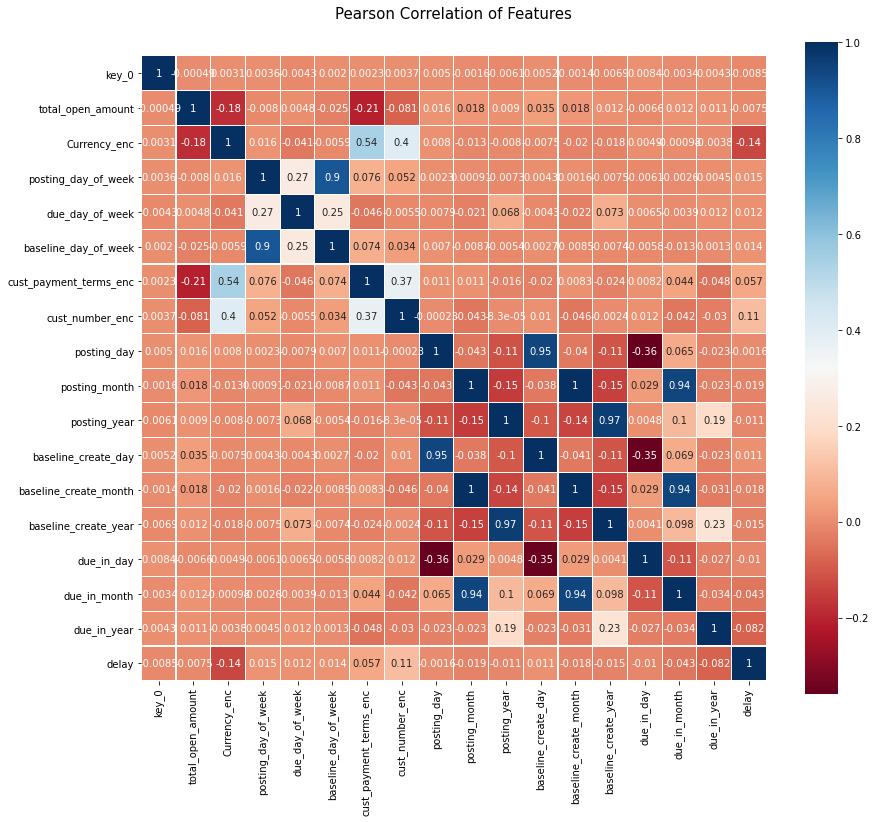

In [91]:
# Pearson graph
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [92]:
# We do not have any constant column because we have already removed them in the Feature Engineering Section
# Refer to In[56] , In[61] , etc.

In [93]:
# These columns don't provide any value to our model

X_train ,X_val, X_test = warbeast(['baseline_create_day','baseline_day_of_week','baseline_create_month','baseline_create_year','posting_year','due_in_year'])

In [94]:
X_train

,total_open_amount,Currency_enc,posting_day_of_week,due_day_of_week,cust_payment_terms_enc,cust_number_enc,posting_day,posting_month,due_in_day,due_in_month
29028,53.25,1,6,0,19,646,30,12,14,1
36076,47408.76,1,6,0,31,738,30,12,14,1
23354,768.00,1,6,0,19,626,30,12,14,1
10265,18684.01,1,6,0,24,722,30,12,14,1
17085,14428.46,1,6,0,31,738,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
32637,49849.15,1,3,4,19,815,24,10,8,11
8007,4019.54,1,3,4,42,743,24,10,8,11
32594,17377.95,1,3,4,19,747,24,10,8,11
8565,55156.96,1,3,4,31,738,24,10,8,11


In [95]:
# We have already converted all the columns to int / float
# Now we can use Variance Threshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [96]:
sel.variances_

array([1.74933167e+09, 7.60531280e-02, 3.26027069e+00, 3.52884689e+00,
       1.21379303e+02, 5.57174786e+04, 7.55759884e+01, 7.87498430e+00,
       7.74873148e+01, 8.00341840e+00])

## Modelling (ML)

In [97]:
# Basic Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
base_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)
base_model.fit(X_train, y_train)

LinearRegression(n_jobs=10, normalize=True)

In [98]:
y_predict = base_model.predict(X_val)

In [99]:
# Checking rmse value of Linear Regression

from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val, y_predict))
print("RMSE VALUE IS : ", RMSE)

RMSE VALUE IS :  7.682433772348744


In [100]:
srm = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [101]:
(abs(srm.Predicted-srm.Actuals)/srm.Actuals).mean()

inf

Decision Tree Model

In [102]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [103]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [104]:
y_predict2 = regressor.predict(X_val)

In [105]:
# Checking rmse value of Decision Tree Regressor

RMSE = mean_squared_error(y_val, y_predict2, squared=False)
print("RMSE VALUE IS : ", RMSE)

RMSE VALUE IS :  6.261556043997308


In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28349 entries, 29028 to 37435
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_open_amount       28349 non-null  float64
 1   Currency_enc            28349 non-null  int32  
 2   posting_day_of_week     28349 non-null  int64  
 3   due_day_of_week         28349 non-null  int64  
 4   cust_payment_terms_enc  28349 non-null  int32  
 5   cust_number_enc         28349 non-null  int32  
 6   posting_day             28349 non-null  int64  
 7   posting_month           28349 non-null  int64  
 8   due_in_day              28349 non-null  int64  
 9   due_in_month            28349 non-null  int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 3.3 MB


Grid Search CV

In [107]:
#importing the sklearn model selection for finding the RMSE,SME,MSE USING GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
grid_search = RandomForestRegressor(n_jobs=20,max_depth=15,n_estimators=80,random_state=42)

In [108]:
# Store the value in grid result
grid_result=grid_search.fit(X_train,y_train)

In [109]:
# Predicting the train value
pt=grid_result.predict(X_train)

In [110]:
# Calculation of rmse value
RMSE=mean_squared_error(y_train,pt,squared=False)
print("RMSE VALUE IS: ",RMSE)
#RMSE=np.sqrt(MSE)

RMSE VALUE IS:  5.548685256470977


#### **Best RMSE value is coming from Grid Search Model**^^

In [111]:
import pip
pip.main(['install', 'xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

XG Boost

In [112]:
from xgboost import XGBRegressor
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [113]:
# Predict the model
pred = model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE VALUE IS: % f" %(rmse))

RMSE VALUE IS:  8.233816


## Getting back Lost Data

In [114]:
# see again price is all nan
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200763229,MAINES corporation,NaN,2020.0,1.930548e+09,2020-02-27,20200219,20200227,20200313.0,USD,RV,1.0,3608.68,20200227.0,NAA8,1.930548e+09,1
4,U001,0200726979,BJ'S us,NaN,2020.0,1.930716e+09,2020-03-22,20200328,20200322,20200406.0,USD,RV,1.0,514.48,20200322.0,NAA8,1.930716e+09,1
6,U001,0200555117,BURR associates,NaN,2020.0,1.930758e+09,2020-04-10,20200407,20200410,20200425.0,USD,RV,1.0,8225.06,20200410.0,NAA8,1.930758e+09,1
7,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930623e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,661.11,20200309.0,NAH4,1.930623e+09,1
8,U001,0200759878,SA associates,NaN,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,27726.01,20200317.0,NAH4,1.930660e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,U001,0100043936,PAPA JO co,NaN,2020.0,1.930845e+09,2020-04-30,20200430,20200430,20200520.0,USD,RV,1.0,3700.87,20200430.0,NAD1,1.930845e+09,1
49986,U001,0200769623,WAL-MAR,NaN,2020.0,1.930772e+09,2020-04-11,20200409,20200411,20200426.0,USD,RV,1.0,83413.60,20200411.0,NAH4,1.930772e+09,1
49988,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930624e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,63976.57,20200310.0,NAH4,1.930624e+09,1
49991,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930712e+09,2020-03-27,20200327,20200327,20200411.0,USD,RV,1.0,43466.85,20200327.0,NAH4,1.930712e+09,1


#### Feature Engg

In [115]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date_1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [116]:
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
main_test.drop(['clear_date'], inplace =True,axis=1)

In [117]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   buisness_year           10000 non-null  float64
 4   doc_id                  10000 non-null  float64
 5   posting_date            10000 non-null  object 
 6   document_create_date    10000 non-null  int64  
 7   document_create_date_1  10000 non-null  int64  
 8   due_in_date             10000 non-null  float64
 9   invoice_currency        10000 non-null  object 
 10  document type           10000 non-null  object 
 11  posting_id              10000 non-null  float64
 12  total_open_amount       10000 non-null  float64
 13  baseline_create_date    10000 non-null  float64
 14  cust_payment_terms      10000 non-null

In [118]:
# Labelling USD and CAD as 0 and 1 using Label Encoder

Currency_encoder = LabelEncoder()
Currency_encoder.fit(X_main_test['invoice_currency'])
X_main_test['Currency_enc'] = Currency_encoder.transform(X_main_test['invoice_currency'])

In [119]:
# Dropping more columns which have been encoded already
X_main_test.drop(['invoice_currency','document_create_date'], axis=1,inplace=True)

In [120]:
# Datetime conversion
X_main_test["baseline_create_date"]=pd.to_datetime(X_main_test["baseline_create_date"], format = '%Y%m%d')
X_main_test["due_in_date"]=pd.to_datetime(X_main_test["due_in_date"], format = '%Y%m%d')

X_main_test["document_create_date_1"]=pd.to_datetime(X_main_test["document_create_date_1"], format = '%Y%m%d')
X_main_test["posting_date"]=pd.to_datetime(X_main_test["posting_date"])

X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  float64       
 4   doc_id                  10000 non-null  float64       
 5   posting_date            10000 non-null  datetime64[ns]
 6   document_create_date_1  10000 non-null  datetime64[ns]
 7   due_in_date             10000 non-null  datetime64[ns]
 8   document type           10000 non-null  object        
 9   posting_id              10000 non-null  float64       
 10  total_open_amount       10000 non-null  float64       
 11  baseline_create_date    10000 non-null  datetime64[ns]
 12  cust_payment_terms      10000 non-null  object

In [121]:
# Clear Day
# 0 --> Monday , 6 --> Sunday
X_main_test['posting_day_of_week'] = X_main_test['posting_date'].dt.weekday
X_main_test['due_day_of_week'] = X_main_test['due_in_date'].dt.weekday
X_main_test['baseline_day_of_week'] = X_main_test['baseline_create_date'].dt.weekday

In [122]:
X_main_test.drop(['buisness_year','document type','posting_id','isOpen','name_customer'],axis=1,inplace=True)

In [123]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   doc_id                  10000 non-null  float64       
 3   posting_date            10000 non-null  datetime64[ns]
 4   document_create_date_1  10000 non-null  datetime64[ns]
 5   due_in_date             10000 non-null  datetime64[ns]
 6   total_open_amount       10000 non-null  float64       
 7   baseline_create_date    10000 non-null  datetime64[ns]
 8   cust_payment_terms      10000 non-null  object        
 9   invoice_id              10000 non-null  float64       
 10  Currency_enc            10000 non-null  int32         
 11  posting_day_of_week     10000 non-null  int64         
 12  due_day_of_week         10000 non-null  int64 

In [124]:
# label encode business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_main_test['business_code'])
X_main_test['business_code_enc']=business_code_encoder.transform(X_main_test['business_code'])

In [125]:
# label encode cust payment terms
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_main_test['cust_payment_terms'])
X_main_test['cust_payment_terms_enc']=cust_payment_terms_encoder.transform(X_main_test['cust_payment_terms'])

In [126]:
# dropping useless columns
X_main_test.drop(['business_code','cust_payment_terms'],axis=1,inplace=True)

In [127]:
# label encode cust number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_main_test['cust_number'])
X_main_test['cust_number_enc']=cust_number_encoder.transform(X_main_test['cust_number'])

In [128]:
# dropping cust number since already encoded
X_main_test.drop(['cust_number'],axis=1,inplace=True)

In [129]:
# dropping invoice id and doc id since they're useless
X_main_test.drop(['invoice_id','doc_id'],axis=1,inplace=True)

In [130]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   posting_date            10000 non-null  datetime64[ns]
 1   document_create_date_1  10000 non-null  datetime64[ns]
 2   due_in_date             10000 non-null  datetime64[ns]
 3   total_open_amount       10000 non-null  float64       
 4   baseline_create_date    10000 non-null  datetime64[ns]
 5   Currency_enc            10000 non-null  int32         
 6   posting_day_of_week     10000 non-null  int64         
 7   due_day_of_week         10000 non-null  int64         
 8   baseline_day_of_week    10000 non-null  int64         
 9   business_code_enc       10000 non-null  int32         
 10  cust_payment_terms_enc  10000 non-null  int32         
 11  cust_number_enc         10000 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(4), in

In [131]:
# Extracting posting day and posting month
X_main_test['posting_day'] = X_main_test['posting_date'].dt.day
X_main_test['posting_month'] = X_main_test['posting_date'].dt.month

In [132]:
# Extracting baseline create day
X_main_test['baseline_create_day'] = X_main_test['baseline_create_date'].dt.day

In [133]:
# Extracting due in day and due in month
X_main_test['due_in_day'] = X_main_test['due_in_date'].dt.day
X_main_test['due_in_month'] = X_main_test['due_in_date'].dt.month

In [134]:
# dropping these columns since already encoded / useless
X_main_test.drop(['baseline_create_date','posting_date','document_create_date_1','due_in_date','business_code_enc','baseline_create_day','baseline_day_of_week'],axis=1,inplace=True)

In [135]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49997
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_open_amount       10000 non-null  float64
 1   Currency_enc            10000 non-null  int32  
 2   posting_day_of_week     10000 non-null  int64  
 3   due_day_of_week         10000 non-null  int64  
 4   cust_payment_terms_enc  10000 non-null  int32  
 5   cust_number_enc         10000 non-null  int32  
 6   posting_day             10000 non-null  int64  
 7   posting_month           10000 non-null  int64  
 8   due_in_day              10000 non-null  int64  
 9   due_in_month            10000 non-null  int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 742.2 KB


## Finalizing Result :

In [136]:
# Predicting the delay values
final_result = grid_result.predict(X_main_test)

In [137]:
# making a list and adding final results into it so that we can append it to delay
final_result = pd.Series(final_result,name='delay')

In [138]:
# resetting the index of main test because we have to merge delay with it
main_test.reset_index(drop=True,inplace=True)

In [139]:
# merging this column onto the dataset and now we have the delay column!
Final = main_test.merge(final_result , on = X_main_test.index )
new = round(Final)
new

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,0200763229,MAINES corporation,2020.0,1.930548e+09,2020-02-27,20200219,20200227,20200313.0,USD,RV,1.0,3609.0,20200227.0,NAA8,1.930548e+09,1,2.0
1,4,U001,0200726979,BJ'S us,2020.0,1.930716e+09,2020-03-22,20200328,20200322,20200406.0,USD,RV,1.0,514.0,20200322.0,NAA8,1.930716e+09,1,5.0
2,6,U001,0200555117,BURR associates,2020.0,1.930758e+09,2020-04-10,20200407,20200410,20200425.0,USD,RV,1.0,8225.0,20200410.0,NAA8,1.930758e+09,1,1.0
3,7,U001,0200769623,WAL-MAR in,2020.0,1.930623e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,661.0,20200309.0,NAH4,1.930623e+09,1,1.0
4,8,U001,0200759878,SA associates,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,27726.0,20200317.0,NAH4,1.930660e+09,1,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49980,U001,0100043936,PAPA JO co,2020.0,1.930845e+09,2020-04-30,20200430,20200430,20200520.0,USD,RV,1.0,3701.0,20200430.0,NAD1,1.930845e+09,1,-15.0
9996,49986,U001,0200769623,WAL-MAR,2020.0,1.930772e+09,2020-04-11,20200409,20200411,20200426.0,USD,RV,1.0,83414.0,20200411.0,NAH4,1.930772e+09,1,-2.0
9997,49988,U001,0200769623,WAL-MAR associates,2020.0,1.930624e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,63977.0,20200310.0,NAH4,1.930624e+09,1,-1.0
9998,49991,U001,0200769623,WAL-MAR foundation,2020.0,1.930712e+09,2020-03-27,20200327,20200327,20200411.0,USD,RV,1.0,43467.0,20200327.0,NAH4,1.930712e+09,1,-1.0


## Making Ageing Bucket

This ageing bucket will classify the delay into categories like -15 to 0 , 0 to 10 , 10 to 20 , etc

In [140]:
# bins is a list storing the boundary values and between two boundaries, one Label would be there
# Example : A customer having delay of 20 days to 30 days will be categorised as Silver Customer

bins= [-1000,-30,-15,0,10,20,30,45,60,1000]
labels = ['Ace Customer','Platinum Customer','Diamond Customer','Gold Customer','Silver Customer','Bronze Customer','Needs to be reminded','Bad relations','Action Needed / Reminder']
new['Ageing Bucket'] = pd.cut(new['delay'], bins=bins, labels=labels, right=False)
new

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date_1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,Ageing Bucket
0,0,U001,0200763229,MAINES corporation,2020.0,1.930548e+09,2020-02-27,20200219,20200227,20200313.0,USD,RV,1.0,3609.0,20200227.0,NAA8,1.930548e+09,1,2.0,Gold Customer
1,4,U001,0200726979,BJ'S us,2020.0,1.930716e+09,2020-03-22,20200328,20200322,20200406.0,USD,RV,1.0,514.0,20200322.0,NAA8,1.930716e+09,1,5.0,Gold Customer
2,6,U001,0200555117,BURR associates,2020.0,1.930758e+09,2020-04-10,20200407,20200410,20200425.0,USD,RV,1.0,8225.0,20200410.0,NAA8,1.930758e+09,1,1.0,Gold Customer
3,7,U001,0200769623,WAL-MAR in,2020.0,1.930623e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,661.0,20200309.0,NAH4,1.930623e+09,1,1.0,Gold Customer
4,8,U001,0200759878,SA associates,2020.0,1.930660e+09,2020-03-17,20200317,20200317,20200401.0,USD,RV,1.0,27726.0,20200317.0,NAH4,1.930660e+09,1,-3.0,Diamond Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49980,U001,0100043936,PAPA JO co,2020.0,1.930845e+09,2020-04-30,20200430,20200430,20200520.0,USD,RV,1.0,3701.0,20200430.0,NAD1,1.930845e+09,1,-15.0,Diamond Customer
9996,49986,U001,0200769623,WAL-MAR,2020.0,1.930772e+09,2020-04-11,20200409,20200411,20200426.0,USD,RV,1.0,83414.0,20200411.0,NAH4,1.930772e+09,1,-2.0,Diamond Customer
9997,49988,U001,0200769623,WAL-MAR associates,2020.0,1.930624e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,63977.0,20200310.0,NAH4,1.930624e+09,1,-1.0,Diamond Customer
9998,49991,U001,0200769623,WAL-MAR foundation,2020.0,1.930712e+09,2020-03-27,20200327,20200327,20200411.0,USD,RV,1.0,43467.0,20200327.0,NAH4,1.930712e+09,1,-1.0,Diamond Customer


## Milestone Finished ! Thank You!